In [2]:
# NUMPY
import numpy as np

# MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

# SKLEARN 
from sklearn.metrics import pairwise_distances

# POT
import ot
from ot import sinkhorn, emd
# from ot.bregman import sinkhorn, greenkhorn

# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/'
sys.path.insert(0, path_files) 

# GREENKHORN 
# from greenkhorn.sinkhorn import sinkhorn as sinkhgreen
# SCREENKHORN
from screenkhorn.screenkhorn import Screenkhorn
# np.random.seed(3946)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data generation

In [3]:
n_1 = 1000# nb samples
n_2 = 1000
mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n_1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n_2, mu_t, cov_t)

a = np.ones((n_1,)) / n_1
b = np.ones((n_2,)) / n_2  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()
reg = 0.01

K = np.exp(-M/reg)

## Sinkhorn's algorithm from POT

In [4]:
P_sink = sinkhorn(a, b, M, reg, log=True)

In [5]:
# Print P^star, u_sink = e^{u^star}, v_sink = e^{v^star}
P_star = P_sink[0]
outputs_dict = P_sink[1]
exp_u_star = outputs_dict['u']
exp_v_star = outputs_dict['v']

## Some norms of $e^{u^\star}$ and $e^{v^\star}$ 

In [6]:
## L_2 norm
norm2exp_u_star = np.linalg.norm(exp_u_star, 2)
norm2exp_v_star  = np.linalg.norm(exp_v_star, 2)

norm2exp_u_star, norm2exp_v_star

(1.5304885287334892e+18, 714740686.6932466)

In [7]:
## L_1 norm
norm1exp_u_star = np.linalg.norm(exp_u_star, 1)
norm1exp_v_star  = np.linalg.norm(exp_v_star, 1)

norm1exp_u_star, norm1exp_v_star

(1.5490247001351368e+18, 790230764.3338237)

In [8]:
## L_infty norm 
norminftyexp_u_star = np.max(exp_u_star)
norminftyexp_v_star = np.max(exp_v_star)

norminftyexp_u_star, norminftyexp_v_star

(1.5304462039464448e+18, 714416164.1706113)

In [9]:
## L_-infty norm 
norm_inftyexp_u_star = np.min(exp_u_star)
norm_inftyexp_v_star = np.min(exp_v_star)

norm_inftyexp_u_star, norm_inftyexp_v_star

(1.6794739664206648e-08, 0.0006510160390800786)

In [10]:
norm_min1_exp_u_star = np.linalg.norm(exp_u_star, -1)
norm_min1_exp_v_star = np.linalg.norm(exp_v_star, -1)

norm_min1_exp_u_star, norm_min1_exp_v_star

(1.5628892463005695e-08, 0.0003812109280121002)

### Plots of $e^{u^\star}$ and $e^{v^\star}$ 

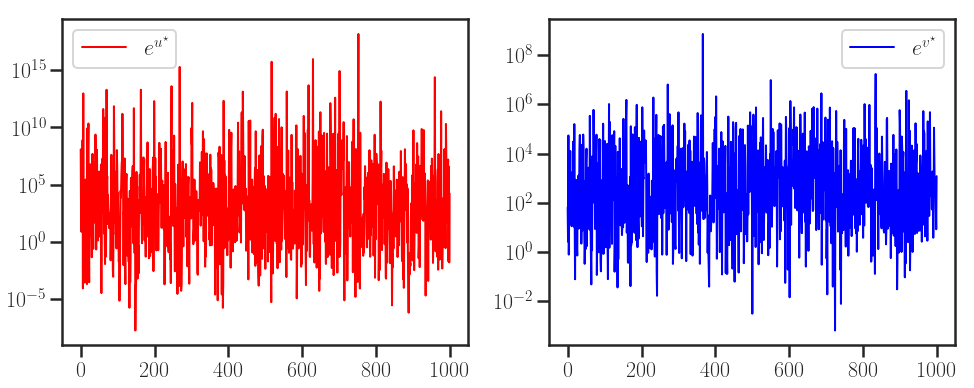

In [11]:
figure, axes= plt.subplots(ncols=2)

axes[0].semilogy(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
axes[1].semilogy(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
axes[0].legend()
axes[1].legend();

#axes[1,0].semilogy(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
#axes[1,1].semilogy(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
#axes[1,0].legend()
#axes[1,1].legend();
#plt.subplots_adjust(hspace=.5)
#plt.tight_layout()

In [12]:
# plt.semilogy(exp_u_star, linewidth=2, color='r', label=r'$e^{u^\star}$')
# plt.semilogy(exp_v_star, linewidth=2, color='b', label=r'$e^{v^\star}$')
# plt.legend();

## Search of the normalization constant 

In [13]:
# C = norm2exp_v_star/norm2exp_u_star
# C

# C = norm1exp_v_star / norm1exp_u_star
# C = norm_inftyexp_u_star / norm1exp_v_star
# C = norm_inftyexp_u_star
C_K = np.exp(- np.log(np.exp(- np.max(K))*np.min(np.hstack([a,b]))))
#C = C*norm_inftyexp_u_star
# C_ahmed = np.sqrt((exp_u_star/exp_v_star).mean()) # Ahmed
C_ = (np.sum(exp_u_star**2) / np.sum(exp_v_star**2))**(1/4)

C = (np.linalg.norm(exp_u_star)**2/ np.linalg.norm(exp_v_star)**2)**(1/4)

# print(C, C_K)
#print(np.linalg.norm((u_star/C_ahmed - v_star*C_ahmed), 1))
#print(np.linalg.norm((u_star/C - v_star*C), 1))
#C = C * C_K
#C = C_K
C, C_K, C_K/100

(46274.398992353956, 2160.0201341739726, 21.600201341739727)

In [14]:
(16)**(1/4)

2.0

In [101]:
exp_u_star_C = exp_u_star*1000/C_K  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
exp_v_star_C = exp_v_star*C_K/1000
# exp_u_star_C = exp_u_star*100/C  #norm_inftyexp_v_star #norm_inftyexp_u_star, norm_min1_exp_u_star, 
# exp_v_star_C = exp_v_star*C/100 #norm_inftyexp_v_star)

# figure, axes= plt.subplots(ncols=2)
# axes[0].semilogy(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
 #axes[1].semilogy(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
 #axes[0].legend()
#axes[1].legend();

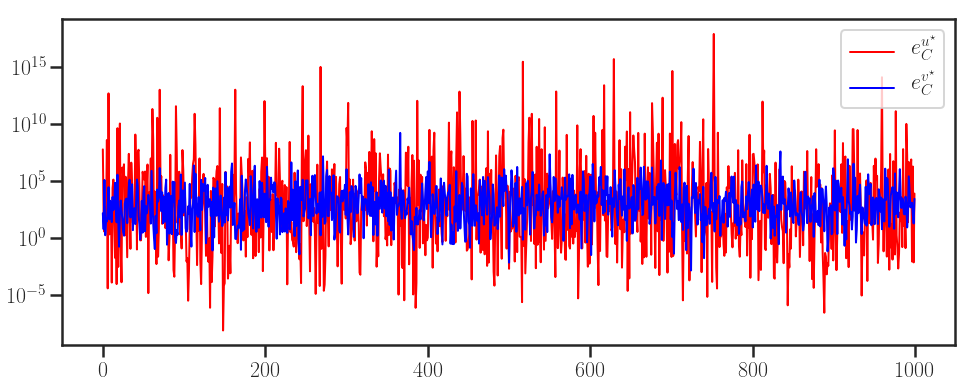

In [102]:
plt.semilogy(exp_u_star_C, linewidth=2, color='r', label=r'$e^{u^\star}_C$')
plt.semilogy(exp_v_star_C, linewidth=2, color='b', label=r'$e^{v^\star}_C$')
plt.legend();

### Plots of $u^\star$ and $v^\star$

In [103]:
u_star = np.log(exp_u_star)
v_star = np.log(exp_v_star)

u_star_C = np.log(exp_u_star_C)
v_star_C = np.log(exp_v_star_C)

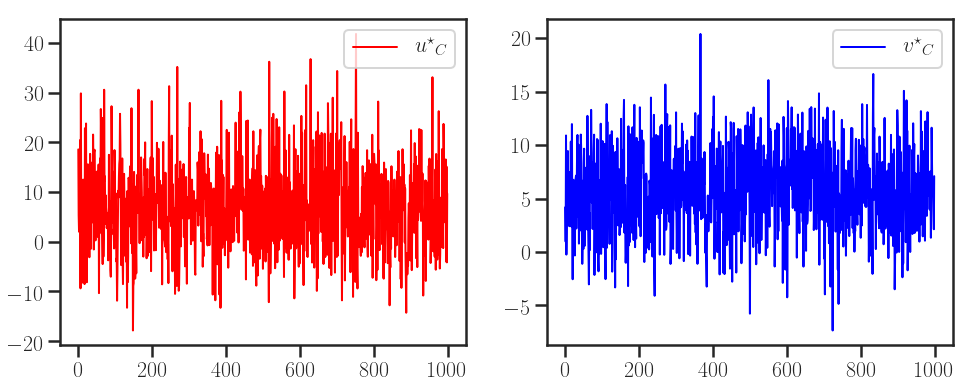

In [104]:
figure, axes= plt.subplots(ncols=2)
axes[0].plot(u_star, linewidth=2, color='r', label=r'${u^\star}_C$')
axes[1].plot(v_star, linewidth=2, color='b', label=r'${v^\star}_C$')
axes[0].legend()
axes[1].legend();

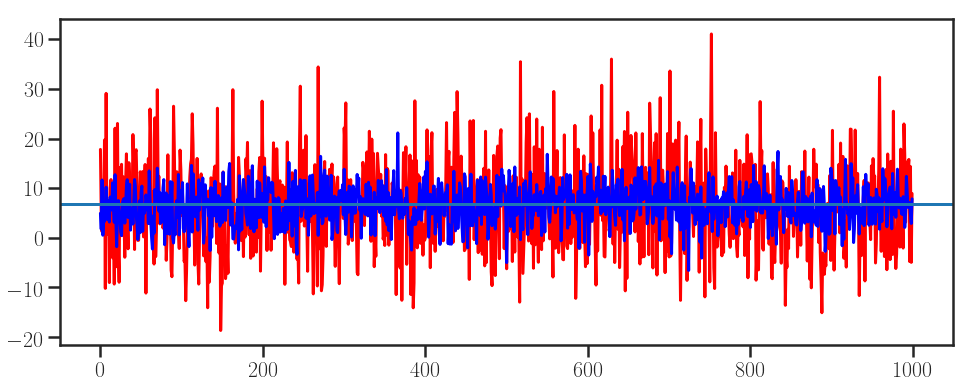

In [108]:
epsilon = 1e3
plt.plot(u_star_C, 'r')
plt.plot(v_star_C, 'b')
plt.axhline(y=np.log(epsilon));

### Choosing of the intervals $I_u$ and $J_u$

In [109]:
I = np.where(exp_u_star_C >= epsilon)[0].tolist()
Ic = np.where(exp_u_star_C < epsilon)[0].tolist()
len(I), len(Ic)

(449, 551)

In [110]:
J = np.where(exp_v_star_C >= epsilon)[0].tolist()
Jc = np.where(exp_v_star_C < epsilon)[0].tolist()
len(J), len(Jc)

(475, 525)

In [111]:
u_star_sc, v_star_sc  = np.zeros(n_1), np.zeros(n_2)
u_star_sc[I] = u_star_C[I]
u_star_sc[Ic] = np.array([np.log(epsilon)] * len(Ic))

v_star_sc[J] = v_star_C[J]
v_star_sc[Jc] = np.array([np.log(epsilon)] * len(Jc))

# `screenkhorn`

In [112]:
screenkhorn = Screenkhorn(a, b, M, reg, epsilon)

In [113]:
proj_grad = screenkhorn.projected_grad(u_star_sc, v_star_sc, I, J, max_iter=100, tol=1e-12, verbose=False)
# u0_epsilon = np.array([np.log(epsilon)] * n_1)
# v0_epsilon = np.array([np.log(epsilon)] * n_2)
# proj_grad = screenkhorn.projected_grad(u0_epsilon, v0_epsilon, I, J, max_iter=100, tol=1e-10, verbose=False)

100%|██████████| 10000/10000 [1:19:00<00:00,  2.13it/s]

Total time taken:  9434.869259
counting cp in the bachtrack loop:  294882


In [114]:
##Check of  _projection functions in the class
# screenkhorn._projection(u_star)
# screenkhorn._projection_cvx(u_star)
# plt.plot(v_star)
# plt.plot(screenkhorn._projection(v_star), color='r')
# plt.plot(screenkhorn._projection_cvx(u_star), color= 'g')
# plt.axhline(y=np.log(epsilon));
# print(np.linalg.norm(v_star - screenkhorn._projection(v_star)))
# print(np.linalg.norm(v_star - screenkhorn._projection_cvx(v_star)))

### Curve of the objective function

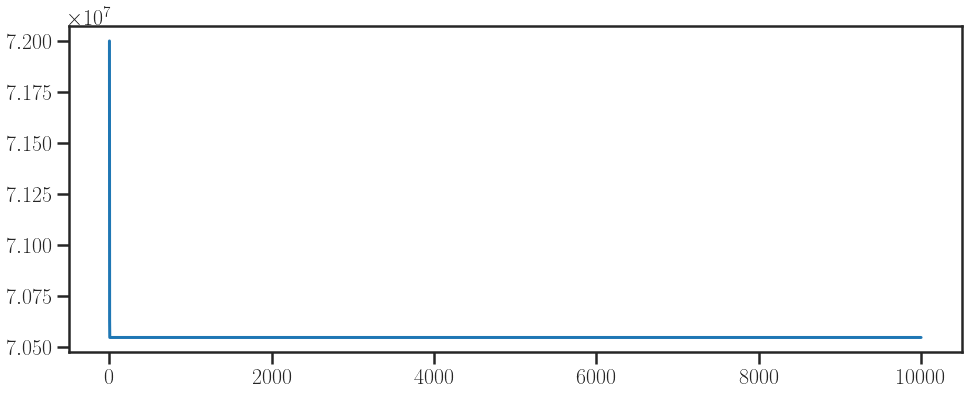

In [119]:
obj = list(proj_grad[2].values())

#plt.yscale('log')
obj = np.asarray(obj)
obj = obj.T
obj.shape = (len(obj,))
plt.plot(obj); # 

### Sort of the solution by `screenkhorn` 

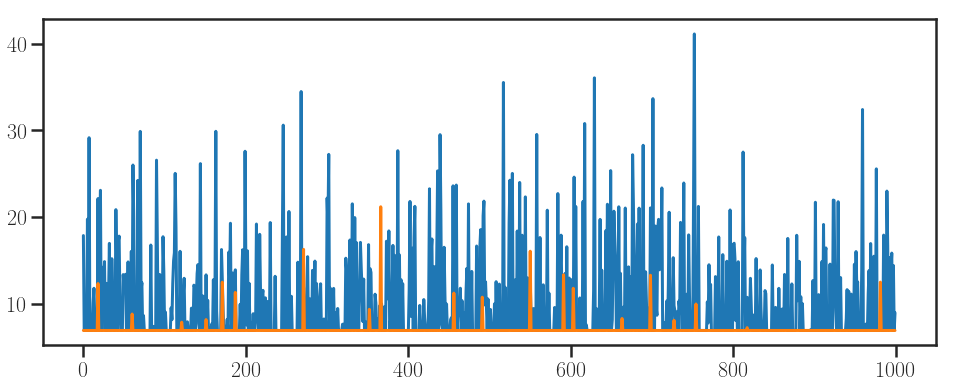

In [120]:
plt.plot(proj_grad[0]);
plt.plot(proj_grad[1]);

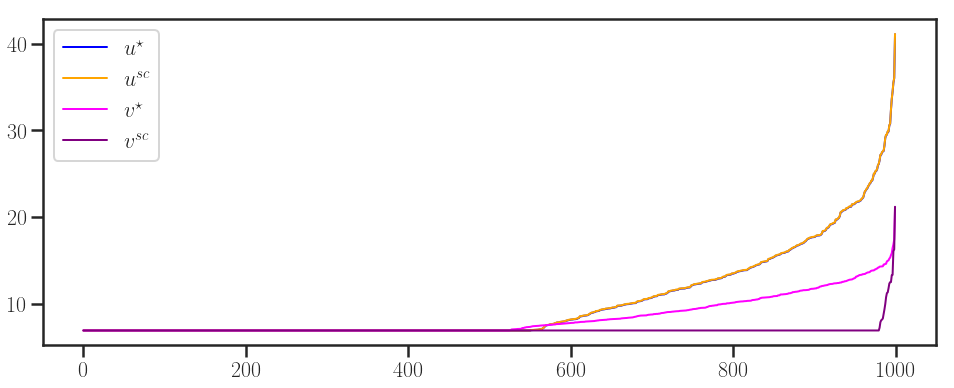

In [123]:
plt.plot(np.sort(u_star_sc), 'blue', linewidth=2, label =r'${u^\star}$')
plt.plot(np.sort(proj_grad[0]), 'orange', linewidth=2, label =r'${u^{{sc}}}$')
plt.plot(np.sort(v_star_sc), 'magenta', linewidth=2, label =r'${v^\star}$')
plt.plot(np.sort(proj_grad[1]), 'purple', linewidth=2, label =r'${v^{{sc}}}$')
# plt.axhline(y =np.log(epsilon), linewidth=, color='r', label=r'$\log(\varepsilon)$');
plt.legend(loc='best');
# plt.title(r'log-potentials vectors of sinkhorn and screenkhorn with ${maxIter}=10000,\,tol=1e-19$')
plt.savefig(r'Potentials vectors of sinkhorn and screenkhorn.pdf', bbox_inches='tight')
plt.show();

In [124]:
u_sc = proj_grad[0]
v_sc = proj_grad[1]

np.linalg.norm(u_star_sc - u_sc), np.linalg.norm(v_star_sc - v_sc)

(0.7034633300988269, 76.78305027474353)